In [1]:
!pip install -q -U watermark

In [2]:
#importar biblioteca

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from datetime import datetime, timedelta

#permitir exibir gráfico no notebook
%matplotlib inline

In [3]:
%reload_ext watermark
%watermark -a "Henrique"
%watermark --iversions
#importante registrar as versões das bibliotecas 

Author: Henrique

matplotlib: 3.10.0
numpy     : 2.1.3
pandas    : 2.3.1
seaborn   : 0.13.2



In [4]:
#gerar os dados para o projeto

def dados(registro = 600):

    """
    Gerando DataFrame do pandas com dados de venda
    """

    produtos = { #dicionario com as informações dos produtos
        'Laptop Gamer': {'categoria': 'Eletrônicos', 'preco': 7500.00},
        'Mouse Vertical': {'categoria': 'Acessórios', 'preco': 250.00},
        'Teclado Mecânico': {'categoria': 'Acessórios', 'preco': 550.00},
        'Monitor Ultrawide': {'categoria': 'Eletrônicos', 'preco': 2800.00},
        'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 1200.00},
        'Headset 7.1': {'categoria': 'Acessórios', 'preco': 800.00},
        'Placa de Vídeo': {'categoria': 'Hardware', 'preco': 4500.00},
        'SSD 1TB': {'categoria': 'Hardware', 'preco': 600.00}
    }

    lista_produtos = list(produtos.keys())

    cidades_estados = { #dicionarios das localização que vai ser usado para distribuição geográfica de nossas vendas
        'São Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG',
        'Porto Alegre': 'RS', 'Salvador': 'BA', 'Curitiba': 'PR', 'Fortaleza': 'CE'
    }

    lista_regiao = list(cidades_estados.keys())

    dados_venda = [] #criamos uma lista vazia em que vai ser registrado as vendas

    data_inicial = datetime(2026,1,26)

    for i in range(registro): #gerar registro de vendas
        nome_produtos = random.choice(lista_produtos) #escolher um produto 
        cidade = random.choice(lista_regiao)#escolher uma região
        quantidade = random.randint(1,8) #gerar quantidade de venda
        data_pedido = data_inicial + timedelta(days = int(i/5), hours = random.randint(0,23)) #calcular data do pedido

        if nome_produtos in ['Mouse Vertical', 'Teclado Mecânico']: #funcao para aplicar um desconto aos itens 
            preco_unitario = produtos[nome_produtos]['preco'] * np.random.uniform(0.9,1.0)
        else:
            preco_unitario = produtos[nome_produtos]['preco']

        dados_venda.append({
            'ID_Pedido': 1000 + i,
            'Data_Pedido': data_pedido,
            'Nome_Produto': nome_produtos,
            'Categoria': produtos[nome_produtos]['categoria'],
            'Preco_Unitario': round(preco_unitario, 2),
            'Quantidade': quantidade,
            'ID_Cliente': np.random.randint(100, 150),
            'Cidade': cidade,
            'Estado': cidades_estados[cidade]
        })

    print("Geração de dados concluída.\n")
    return pd.DataFrame(dados_venda)


#tudo isso para gerar massa de dados fictícios

In [5]:
dados()

Geração de dados concluída.



,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-26 05:00:00,Placa de Vídeo,Hardware,4500.00,2,109,Fortaleza,CE
1,1001,2026-01-26 21:00:00,Cadeira Gamer,Móveis,1200.00,4,137,Belo Horizonte,MG
2,1002,2026-01-26 10:00:00,Cadeira Gamer,Móveis,1200.00,8,104,Belo Horizonte,MG
3,1003,2026-01-26 05:00:00,Monitor Ultrawide,Eletrônicos,2800.00,6,129,Porto Alegre,RS
4,1004,2026-01-26 04:00:00,Laptop Gamer,Eletrônicos,7500.00,4,106,Rio de Janeiro,RJ
...,...,...,...,...,...,...,...,...,...
595,1595,2026-05-25 23:00:00,Laptop Gamer,Eletrônicos,7500.00,1,120,Porto Alegre,RS
596,1596,2026-05-25 22:00:00,Mouse Vertical,Acessórios,248.73,5,132,Belo Horizonte,MG
597,1597,2026-05-25 02:00:00,Mouse Vertical,Acessórios,237.59,6,141,Curitiba,PR
598,1598,2026-05-25 09:00:00,Monitor Ultrawide,Eletrônicos,2800.00,7,138,Porto Alegre,RS


In [8]:
df_vendas = dados(500)

Geração de dados concluída.



In [9]:
df_vendas.shape

(500, 9)

In [10]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-26 00:00:00,Monitor Ultrawide,Eletrônicos,2800.00,2,122,São Paulo,SP
1,1001,2026-01-26 16:00:00,Mouse Vertical,Acessórios,225.82,3,132,Fortaleza,CE
2,1002,2026-01-26 10:00:00,Cadeira Gamer,Móveis,1200.00,8,109,Porto Alegre,RS
3,1003,2026-01-26 14:00:00,Cadeira Gamer,Móveis,1200.00,1,124,Fortaleza,CE
4,1004,2026-01-26 05:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,144,Rio de Janeiro,RJ


In [11]:
df_vendas.tail()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
495,1495,2026-05-05 16:00:00,Mouse Vertical,Acessórios,242.22,4,102,Rio de Janeiro,RJ
496,1496,2026-05-05 17:00:00,Headset 7.1,Acessórios,800.00,2,100,São Paulo,SP
497,1497,2026-05-05 15:00:00,Mouse Vertical,Acessórios,234.39,7,117,Porto Alegre,RS
498,1498,2026-05-05 17:00:00,Cadeira Gamer,Móveis,1200.00,2,136,Curitiba,PR
499,1499,2026-05-05 19:00:00,Monitor Ultrawide,Eletrônicos,2800.00,2,133,São Paulo,SP


In [12]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 35.3+ KB


In [13]:
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,500.000000,500,500.000000,500.000000,500.000000
mean,1249.500000,2026-03-16 23:23:45.600000,2279.616060,4.352000,123.854000
min,1000.000000,2026-01-26 00:00:00,225.030000,1.000000,100.000000
25%,1124.750000,2026-02-20 02:45:00,543.072500,2.000000,111.000000
50%,1249.500000,2026-03-17 03:00:00,1200.000000,4.000000,123.000000
75%,1374.250000,2026-04-10 20:15:00,2800.000000,6.250000,136.250000
max,1499.000000,2026-05-05 19:00:00,7500.000000,8.000000,149.000000
std,144.481833,NaN,2409.215223,2.361196,14.560381


In [15]:
df_vendas.dtypes

ID_Pedido                  int64
Data_Pedido       datetime64[ns]
Nome_Produto              object
Categoria                 object
Preco_Unitario           float64
Quantidade                 int64
ID_Cliente                 int64
Cidade                    object
Estado                    object
dtype: object

In [18]:
#Limpeza, Pré-Processamento e Engenharia de Atributos

df_vendas["Data_Pedido"] = pd.to_datetime(df_vendas["Data_Pedido"])
df_vendas['Faturamento'] = df_vendas['Preco_Unitario'] * df_vendas['Quantidade']
df_vendas['Status_Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rápida' if estado in ['SP', 'RJ', 'MG'] else 'Normal')

In [19]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
 9   Faturamento     500 non-null    float64       
 10  Status_Entrega  500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 43.1+ KB


In [20]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-26 00:00:00,Monitor Ultrawide,Eletrônicos,2800.00,2,122,São Paulo,SP,5600.00,Rápida
1,1001,2026-01-26 16:00:00,Mouse Vertical,Acessórios,225.82,3,132,Fortaleza,CE,677.46,Normal
2,1002,2026-01-26 10:00:00,Cadeira Gamer,Móveis,1200.00,8,109,Porto Alegre,RS,9600.00,Normal
3,1003,2026-01-26 14:00:00,Cadeira Gamer,Móveis,1200.00,1,124,Fortaleza,CE,1200.00,Normal
4,1004,2026-01-26 05:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,144,Rio de Janeiro,RJ,2800.00,Rápida


In [43]:
#Análise 1 - Top 10 Produtos Mais Vendidos

top_10 = df_vendas.groupby("Nome_Produto")["Quantidade"].sum().sort_values(ascending=False).head(10) 
top_10

Nome_Produto
Monitor Ultrawide    298
Laptop Gamer         296
Headset 7.1          294
Teclado Mecânico     284
Mouse Vertical       278
Cadeira Gamer        260
Placa de Vídeo       244
SSD 1TB              222
Name: Quantidade, dtype: int64

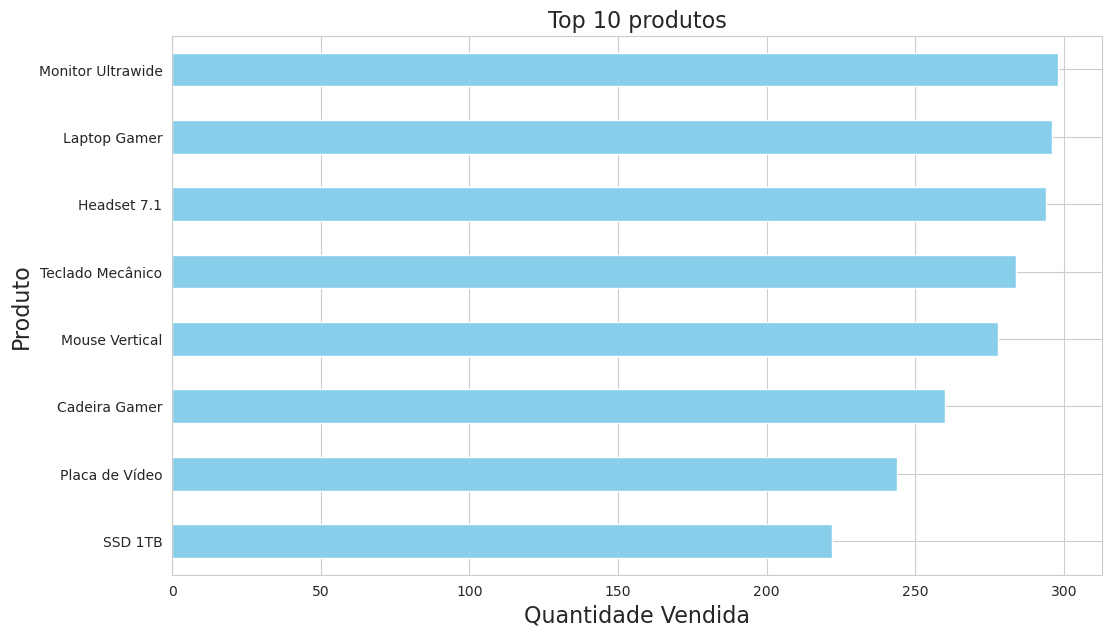

In [45]:
#gerar gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

top_10.sort_values(ascending=True).plot(kind = "barh",color = "skyblue")

plt.title("Top 10 produtos", fontsize = 16)
plt.xlabel("Quantidade Vendida", fontsize = 16)
plt.ylabel("Produto", fontsize = 16)

plt.tight_layout
plt.show()

In [46]:
df_vendas["Mes"] = df_vendas["Data_Pedido"].dt.to_period("M")

In [49]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega,Mes
0,1000,2026-01-26 00:00:00,Monitor Ultrawide,Eletrônicos,2800.00,2,122,São Paulo,SP,5600.00,Rápida,2026-01
1,1001,2026-01-26 16:00:00,Mouse Vertical,Acessórios,225.82,3,132,Fortaleza,CE,677.46,Normal,2026-01
2,1002,2026-01-26 10:00:00,Cadeira Gamer,Móveis,1200.00,8,109,Porto Alegre,RS,9600.00,Normal,2026-01
3,1003,2026-01-26 14:00:00,Cadeira Gamer,Móveis,1200.00,1,124,Fortaleza,CE,1200.00,Normal,2026-01
4,1004,2026-01-26 05:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,144,Rio de Janeiro,RJ,2800.00,Rápida,2026-01


In [51]:
faturamento_mes = df_vendas.groupby("Mes")["Faturamento"].sum()

In [52]:
faturamento_mes

Mes
2026-01     204503.71
2026-02    1621012.37
2026-03    1299557.10
2026-04    1758418.97
2026-05     164659.10
Freq: M, Name: Faturamento, dtype: float64

In [53]:
faturamento_mes.index = faturamento_mes.index.strftime("%Y-%m")
faturamento_mes.map("R$ {:,.2f}".format)

Mes
2026-01      R$ 204,503.71
2026-02    R$ 1,621,012.37
2026-03    R$ 1,299,557.10
2026-04    R$ 1,758,418.97
2026-05      R$ 164,659.10
Name: Faturamento, dtype: object

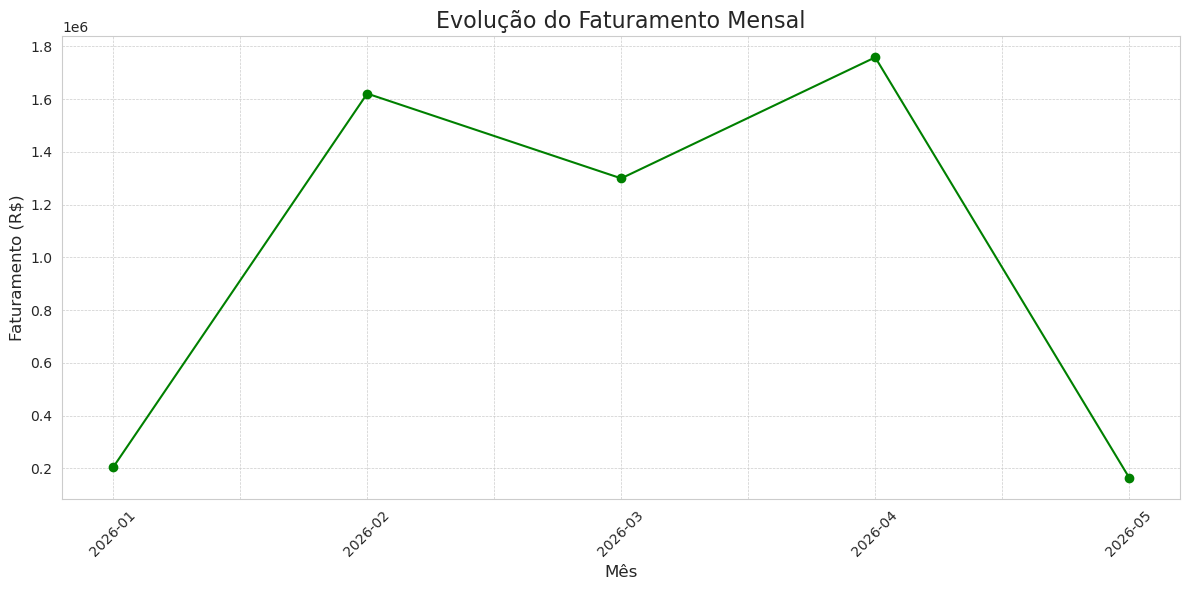

In [57]:
plt.figure(figsize= (12,6))

faturamento_mes.plot(kind = "line", marker = "o", linestyle = "-", color = "green")


plt.title('Evolução do Faturamento Mensal', fontsize = 16)
plt.xlabel('Mês', fontsize = 12)
plt.ylabel('Faturamento (R$)', fontsize = 12)

plt.xticks(rotation = 45)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.tight_layout()


plt.show()

In [74]:
venda_estado = df_vendas.groupby("Estado")["Faturamento"].sum().sort_values(ascending=False)
venda_estado.map("R$ {:,.2f}".format)
venda_estado

Estado
RS    1048014.67
MG     740895.93
PR     730715.31
RJ     664297.76
BA     664159.86
SP     627379.97
CE     572687.75
Name: Faturamento, dtype: float64

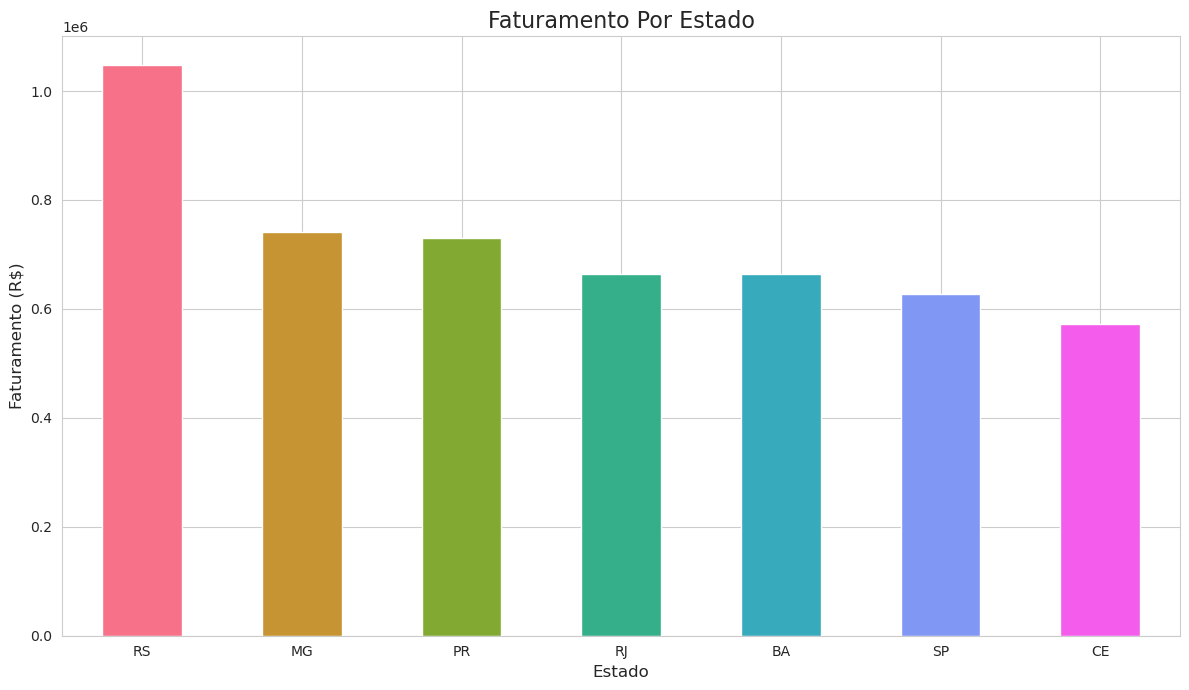

In [75]:
plt.figure(figsize = (12, 7))
venda_estado.plot(kind = 'bar', color = sns.color_palette("husl", 7))
plt.title('Faturamento Por Estado', fontsize = 16)
plt.xlabel('Estado', fontsize = 12)
plt.ylabel('Faturamento (R$)', fontsize = 12)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [76]:
faturamento_categoria = df_vendas.groupby("Categoria")["Faturamento"].sum().sort_values(ascending=False)
faturamento_categoria.map("R$ {:,.2f}".format)
faturamento_categoria

Categoria
Eletrônicos    3054400.00
Hardware       1231200.00
Acessórios      450551.25
Móveis          312000.00
Name: Faturamento, dtype: float64

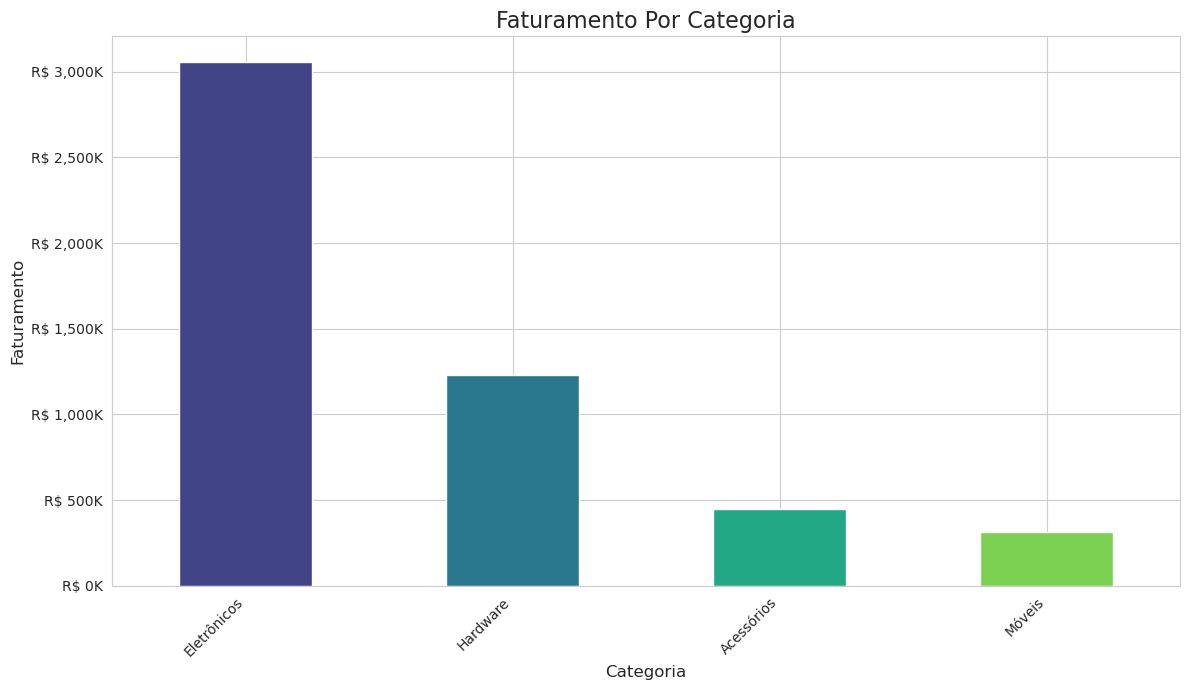

In [78]:
from matplotlib.ticker import FuncFormatter
faturamento_ordenado = faturamento_categoria.sort_values(ascending = False)
fig, ax = plt.subplots(figsize = (12, 7))

def formatador_milhares(y, pos):
    """Formata o valor em milhares (K) com o cifrão R$."""
    return f'R$ {y/1000:,.0f}K'

formatter = FuncFormatter(formatador_milhares)

ax.yaxis.set_major_formatter(formatter)

faturamento_ordenado.plot(kind = 'bar', ax = ax, color = sns.color_palette("viridis", len(faturamento_ordenado)))

ax.set_title('Faturamento Por Categoria', fontsize = 16)
ax.set_xlabel('Categoria', fontsize = 12)
ax.set_ylabel('Faturamento', fontsize = 12)

plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()

plt.show()